<a href="https://colab.research.google.com/github/dorababupudi/codeclause/blob/main/Sales_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
Sales_df= pd.read_csv('/content/SalesDataset.csv')

In [6]:
Sales_df

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.000000,NaN
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.000000,NaN
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.000000,NaN
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.000000,NaN
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,34862,2/7/2016,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.000000,NaN
34863,34863,3/13/2015,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.000000,NaN
34864,34864,4/5/2015,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.000000,NaN
34865,34865,8/30/2015,2015.0,August,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2320.00,1568.000000,2320.0,1568.000000,NaN


In [7]:
Sales_df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


In [8]:
Sales_df.shape

(34867, 16)

In [9]:
Sales_df.dtypes

index                 int64
Date                 object
Year                float64
Month                object
Customer Age        float64
Customer Gender      object
Country              object
State                object
Product Category     object
Sub Category         object
Quantity            float64
Unit Cost           float64
Unit Price          float64
Cost                float64
Revenue             float64
Column1             float64
dtype: object

<Axes: >

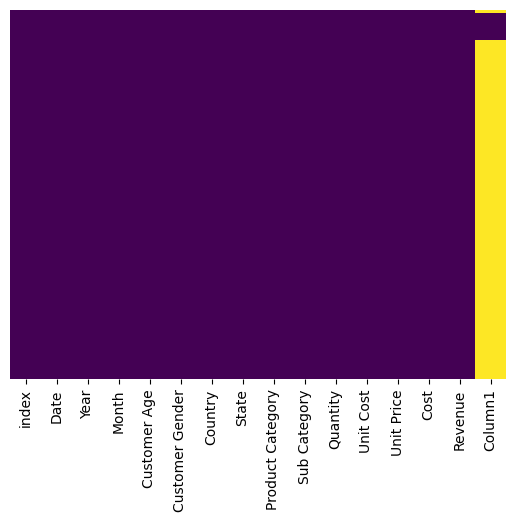

In [10]:
sns.heatmap(Sales_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
Sales_df.drop("Column1", axis = 1, inplace = True)

In [12]:
Sales_df.isna().sum()

index               0
Date                1
Year                1
Month               1
Customer Age        1
Customer Gender     1
Country             1
State               1
Product Category    1
Sub Category        1
Quantity            1
Unit Cost           1
Unit Price          1
Cost                1
Revenue             0
dtype: int64

In [13]:
Sales_df[Sales_df['Date'].isna()]

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
34866,34866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,641.532095


In [14]:
Sales_df.drop(index = 34866, inplace = True)

In [15]:
Sales_df.isna().sum()

index               0
Date                0
Year                0
Month               0
Customer Age        0
Customer Gender     0
Country             0
State               0
Product Category    0
Sub Category        0
Quantity            0
Unit Cost           0
Unit Price          0
Cost                0
Revenue             0
dtype: int64

<Axes: >

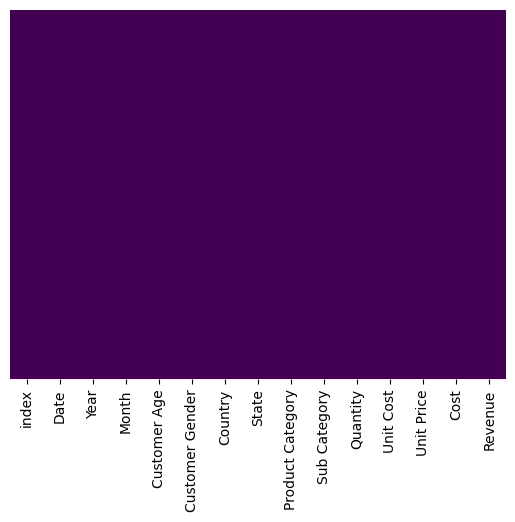

In [16]:
sns.heatmap(Sales_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
#We added the Profit column to visualize the dataset more clearly.
Sales_df['Profit'] = Sales_df['Revenue'] - Sales_df['Cost']
Sales_df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,29.0
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,8.0
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,4.0
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,58.0
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,20.0


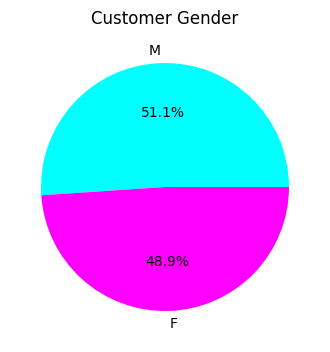

In [18]:
plt.figure(figsize = (4,6))

plt.pie(Sales_df["Customer Gender"].value_counts(), labels = Sales_df["Customer Gender"].value_counts().index, autopct='%1.1f%%', colors = ["cyan","fuchsia"])
plt.title("Customer Gender")

plt.show()

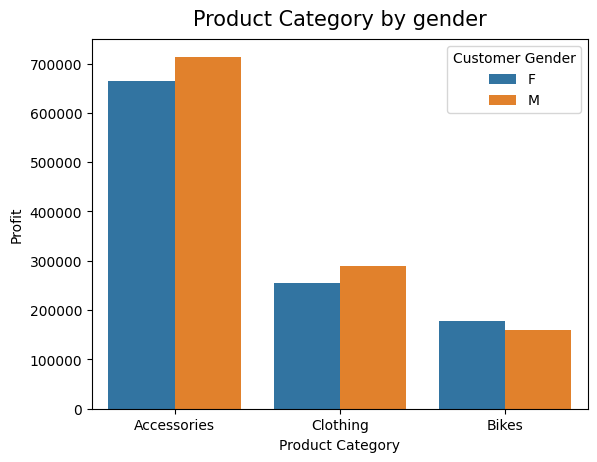

In [19]:
profit_by_gender = Sales_df.groupby(['Customer Gender','Product Category'])['Profit'].sum().reset_index().sort_values(['Customer Gender','Profit'],ascending=[True,False])
sns.barplot(data=profit_by_gender,x='Product Category',y='Profit',hue='Customer Gender')
plt.title("Product Category by gender", pad=10, fontsize=15)
plt.show()

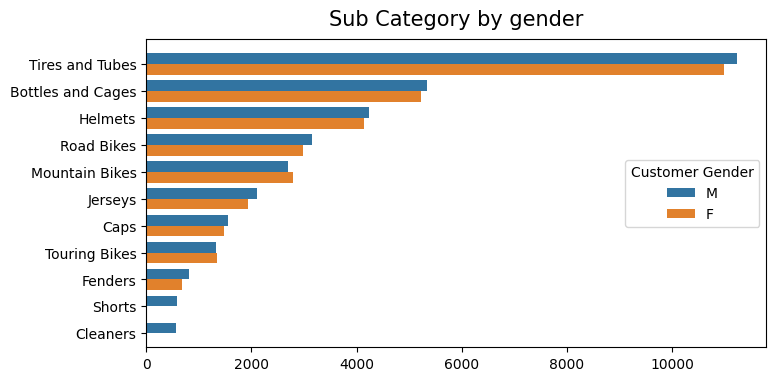

In [20]:
popular_item = Sales_df.groupby(['Sub Category', 'Customer Gender'])['Quantity'].sum().reset_index().sort_values(by = 'Quantity', ascending = False).reset_index(drop = True).head(20)
fig = plt.figure(figsize=(8,4),)
ax = sns.barplot(data = popular_item, x = 'Quantity', y = 'Sub Category', hue = 'Customer Gender')
plt.title("Sub Category by gender", pad=10, fontsize=15)
plt.ylabel("", labelpad=20)
plt.xlabel("", labelpad=20)
plt.axis('tight')
plt.show()

In [21]:
for i in Sales_df["Customer Age"]:
    if i in range(15,18):
        Sales_df.loc[Sales_df["Customer Age"]== i, "Age Category"]= "15-18"
    elif i in range(19,25):
        Sales_df.loc[Sales_df["Customer Age"]== i, "Age Category"]= "19-25"
    elif i in range(25,35):
        Sales_df.loc[Sales_df["Customer Age"]== i, "Age Category"]= "25-35"
    elif i in range(35,45):
        Sales_df.loc[Sales_df["Customer Age"]== i, "Age Category"]= "35-45"
    elif i in range(45,60):
        Sales_df.loc[Sales_df["Customer Age"]== i, "Age Category"]= "45-60"
    elif i in range(60,70):
        Sales_df.loc[Sales_df["Customer Age"]== i, "Age Category"]= "60-70"
    elif i in range(70,80):
        Sales_df.loc[Sales_df["Customer Age"]== i, "Age Category"]= "70-80"
    elif i in range(80,90):
        Sales_df.loc[Sales_df["Customer Age"]== i, "Age Category"]= "80-90"

Text(0.5, 1.0, 'Quantity sold by age')

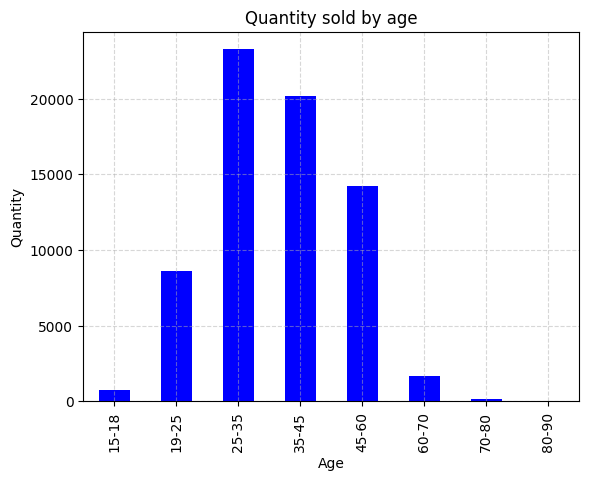

In [22]:
qty_by_age= Sales_df["Quantity"].groupby(Sales_df["Age Category"]).sum()
qty_by_age.plot.bar(y="Quantity", x="Age Category", color= "blue")
plt.xlabel("Age")
plt.ylabel("Quantity")
plt.grid(True, linestyle='--', alpha=0.5)
plt.title("Quantity sold by age")

<function matplotlib.pyplot.show(close=None, block=None)>

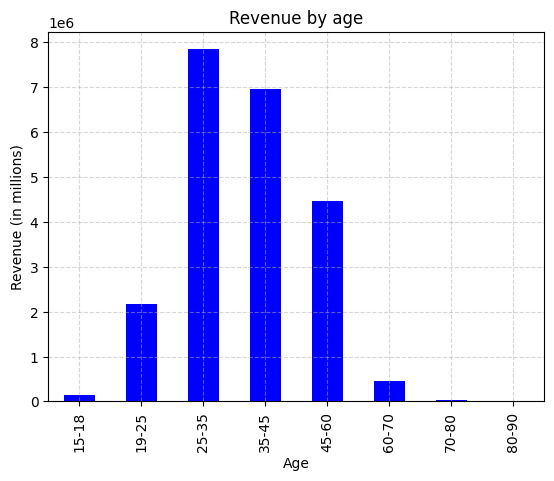

In [23]:
revenue_by_age= Sales_df["Revenue"].groupby(Sales_df["Age Category"]).sum()
revenue_by_age.plot.bar(y="Revenue", x="Age Category", color= "blue")
plt.xlabel("Age")
plt.ylabel("Revenue (in millions)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.title("Revenue by age")
plt.show

In [24]:
# We will create a Year_month column for further understanding the revenue
Sales_df['Date']=pd.to_datetime(Sales_df['Date'])
Sales_df['Year_Month'] = Sales_df['Date'].dt.strftime('%Y-%m')

In [25]:
Sales_df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit,Age Category,Year_Month
0,0,2016-02-19,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,29.0,25-35,2016-02
1,1,2016-02-20,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,8.0,25-35,2016-02
2,2,2016-02-27,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,4.0,25-35,2016-02
3,3,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,58.0,25-35,2016-03
4,4,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,20.0,25-35,2016-03


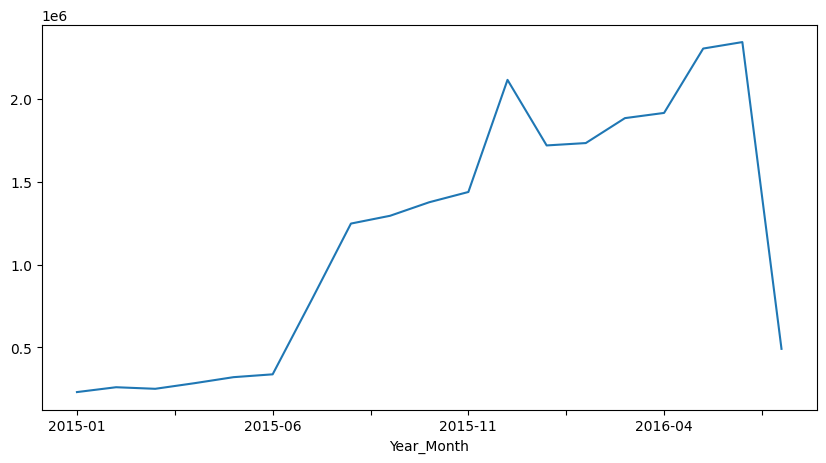

In [26]:
plt.figure(figsize=(10, 5))
Sales_df.groupby(['Year_Month'])['Revenue'].sum().plot(title='');

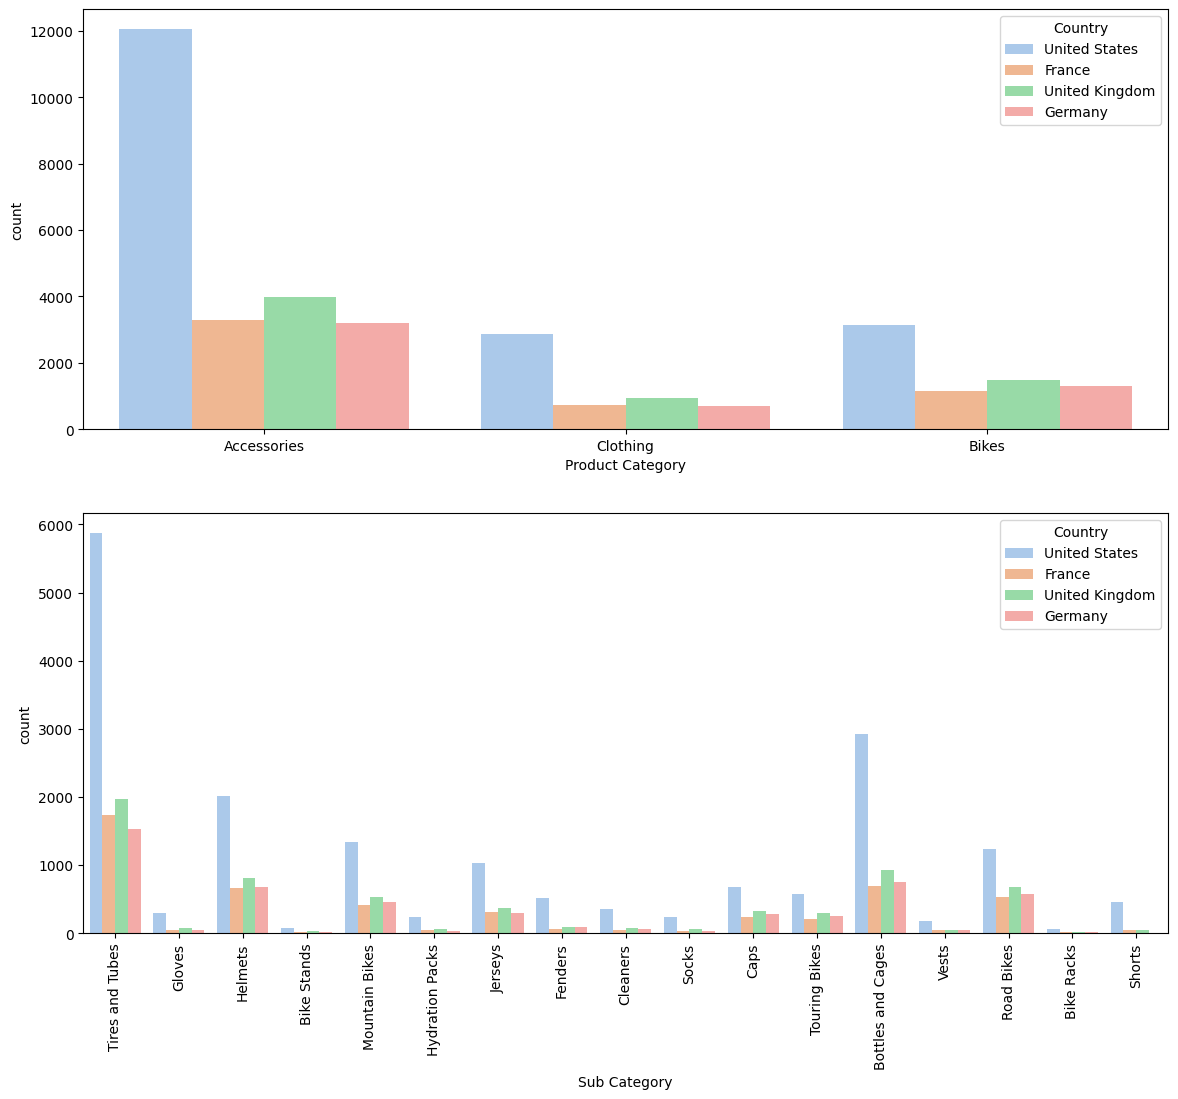

In [27]:
plt.figure(figsize = (14,12))

plt.subplot(2,1,1)
sns.countplot(data = Sales_df, x = "Product Category", hue = "Country", palette = "pastel")

plt.subplot(2,1,2)
sns.countplot(data = Sales_df, x = "Sub Category", hue = "Country", palette = "pastel")
plt.xticks(rotation = 90)

plt.show()

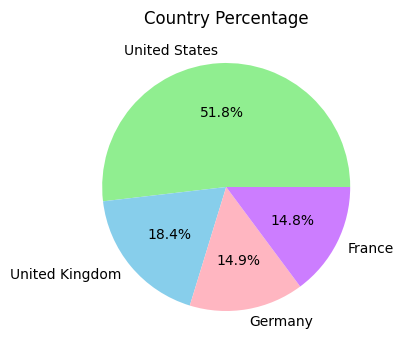

In [28]:
plt.figure(figsize = (4,6))

plt.pie(Sales_df["Country"].value_counts(), labels = Sales_df["Country"].value_counts().index, autopct='%1.1f%%', colors = ["lightgreen","skyblue", "lightpink", "#CC7DFF"])
plt.title("Country Percentage")

plt.show()